# Level 2

## Task 1: Price Range Analysis

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [9]:
df=pd.read_csv('Dataset .csv')

In [10]:
df['Price range'].value_counts()


Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [11]:
df['Price range'].mode()

0    1
Name: Price range, dtype: int64

In [12]:
df.groupby('Price range')['Aggregate rating'].mean()


Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64

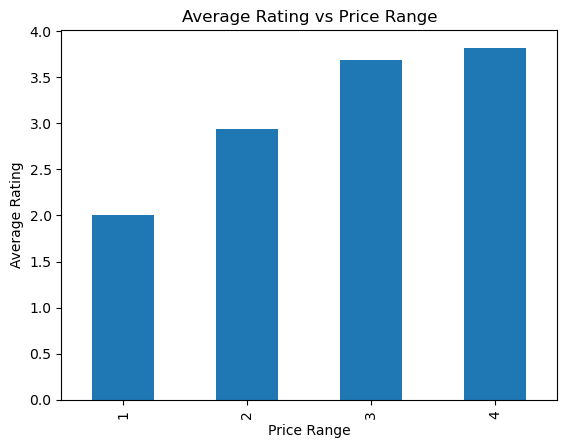

In [13]:
df.groupby('Price range')['Aggregate rating'].mean().plot(kind='bar')
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.title("Average Rating vs Price Range")
plt.show()


In [14]:
df.groupby('Price range')['Aggregate rating'].mean().idxmax()

np.int64(4)

## Task 2: Feature Engineering


In [15]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [16]:
df=pd.read_csv('Dataset .csv')

In [17]:
df['Has Table booking'].head()


0    Yes
1    Yes
2    Yes
3     No
4    Yes
Name: Has Table booking, dtype: object

In [18]:


df['Has Table booking'] = df['Has Table booking'].fillna('No')
df['Has Online delivery'] = df['Has Online delivery'].fillna('No')


In [19]:
df['Has Table booking'] = df['Has Table booking'].astype(str).str.strip().str.lower()
df['Has Online delivery'] = df['Has Online delivery'].astype(str).str.strip().str.lower()


In [20]:
df['Has Table booking'].unique()


array(['yes', 'no'], dtype=object)

In [21]:
df['Has Table booking'] = df['Has Table booking'].map({'yes': 1, 'no': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'yes': 1, 'no': 0})


In [22]:
df[['Has Table booking', 'Has Online delivery']].head()


Has Table booking  Has Online delivery
0                  1                    0
1                  1                    0
2                  1                    0
3                  0                    0
4                  1                    0

## TASK 3 : Predictive Modeling

In [23]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)                 1   
1                          Japanese  ...  Botswana Pula(P)                 1   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)                 1   
3                   Japanese, Sushi  ...  Botswana Pula(P)                 0   
4                  Japanese, Korean  ...  Botswana Pula(P)                 1   

   Has Online delivery  Is delivering now Switch to order menu Price range  \
0                    0                 No                   No           3   
1                    0                 No                   No           3   
2                    0                 No                   No           4   
3                    0                 No                   No           4   
4                    0                 No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [24]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [25]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r


In [26]:
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()

df['Distance_km'] = df.apply(
    lambda row: haversine(center_lat, center_lon, row['Latitude'], row['Longitude']),
    axis=1
)


In [27]:
median_distance = df['Distance_km'].median()

df['Distance_Category'] = df['Distance_km'].apply(
    lambda x: 1 if x > median_distance else 0
)


In [28]:
df[['Distance_km', 'Distance_Category']].head()


Distance_km  Distance_Category
0  6024.054768                  1
1  6023.190958                  1
2  6026.333045                  1
3  6026.137293                  1
4  6026.276169                  1

In [29]:
final_df = df[
    [
        'Price range',
        'Has Table booking',
        'Has Online delivery',
        'Votes',
        'Distance_Category',
        'Aggregate rating'
    ]
]


In [30]:
final_df.head()

Price range  Has Table booking  Has Online delivery  Votes  \
0            3                  1                    0    314   
1            3                  1                    0    591   
2            4                  1                    0    270   
3            4                  0                    0    365   
4            4                  1                    0    229   

   Distance_Category  Aggregate rating  
0                  1               4.8  
1                  1               4.5  
2                  1               4.4  
3                  1               4.9  
4                  1               4.8

In [31]:
X = final_df.drop('Aggregate rating', axis=1)
y = final_df['Aggregate rating']


Split the data

In [32]:
from sklearn.model_selection import train_test_split

X = final_df.drop('Aggregate rating', axis=1)
y = final_df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [34]:
y_pred = model.predict(X_test)


In [35]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Absolute Error: 0.25152098340362566
R2 Score: 0.9347342918233459


## website code

In [36]:
import pickle

with open("restaurant_rating_model.pkl", "wb") as file:
    pickle.dump(model, file)
